In [1]:
%load_ext load_style
%load_style talk.css

# Scipy

In [2]:
import addutils.toc ; addutils.toc.js(ipy_notebook=True)

In [3]:
from IPython.display import Image, HTML
import numpy as np
from numpy import ma
import matplotlib.pyplot as plt
%matplotlib inline

**Scipy** can is a library (but can be thought more as a scientific python distribution) that is built on top of Numpy and
and provides a large set of standard scientific computing algorithms, in particular: 

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

We'll only have a look at some of these sub-packages, more directly relevant to **analyzing** data
   
   
+ **scipy.stats**: standard continuous and discrete probability distributions (density functions, samplers, ...), various statistical tests, and more descriptive statistics. 
+ **scipy.interpolate**: 1D and 2D interpolation


In [4]:
HTML("<iframe src='http://scipy.org/' width=1000 height=500></iframe>")

In [5]:
import scipy; print(scipy.__version__)

0.17.0


## Statistics: Scipy.stats

In [6]:
from scipy import stats

In [7]:
dir(stats)

['Tester',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binned_statistic',
 '_constants',
 '_continuous_distns',
 '_discrete_distns',
 '_distn_infrastructure',
 '_distr_params',
 '_multivariate',
 '_rank',
 '_stats_mstats_common',
 '_tukeylambda_stats',
 'absolute_import',
 'alpha',
 'anderson',
 'anderson_ksamp',
 'anglit',
 'ansari',
 'arcsine',
 'bartlett',
 'bayes_mvs',
 'bernoulli',
 'beta',
 'betai',
 'betaprime',
 'binned_statistic',
 'binned_statistic_2d',
 'binned_statistic_dd',
 'binom',
 'binom_test',
 'boltzmann',
 'boxcox',
 'boxcox_llf',
 'boxcox_normmax',
 'boxcox_normplot',
 'bradford',
 'burr',
 'cauchy',
 'chi',
 'chi2',
 'chi2_contingency',
 'chisqprob',
 'chisquare',
 'circmean',
 'circstd',
 'circvar',
 'combine_pvalues',
 'contingency',
 'cosine',
 'cumfreq',
 'describe',
 'dgamma',
 'dirichlet',
 'distributions',
 'division',
 'dlaplace',
 'dweibull',
 'entropy',
 'er

### Distributions and fitting distributions with Scipy stats

#### distributions in scipy 

see some references:     
+ [distributions in scipy by John D. Cook](http://www.johndcook.com/distributions_scipy.html)
+ [Probability distribution parameterizations in SciPy](http://www.johndcook.com/blog/2010/02/03/statistical-distributions-in-scipy/)

In [ ]:
stats.distributions.

In [9]:
# create a (continous) random variable with normal distribution
Y = stats.distributions.norm()

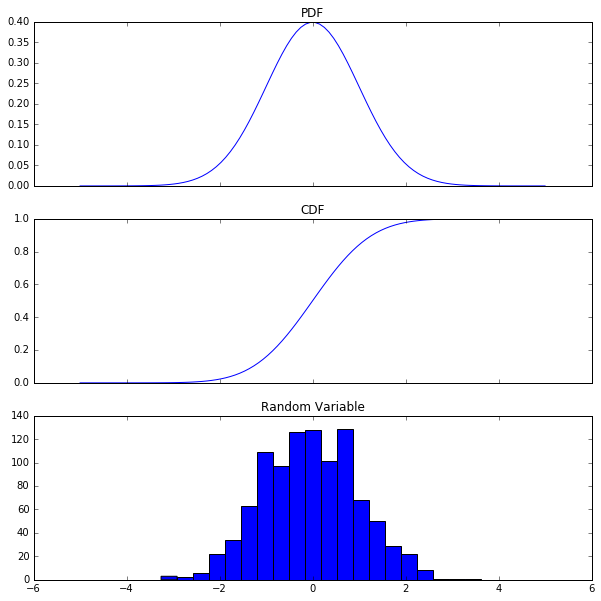

In [10]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True, figsize=(10,10))

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))
axes[0].set_title('PDF')

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));
axes[1].set_title('CDF')

# plot histogram of 1000 random realizations of the variable Y ~ N(0,1)
axes[2].hist(Y.rvs(size=1000), bins=20);
axes[2].set_title('Random Variable');

#### Fitting data to a particular distribution

An recurring statistical problem is finding estimates of the relevant parameters that correspond to the distribution that best represents our data. In **parametric** inference, we specify *a priori* a suitable distribution, then choose the parameters that best fit the data.

We're going to see how to do that in Python using two methods:

* The **Method of moments** chooses the parameters so that the sample moments (typically the sample mean and variance) match the theoretical moments of our chosen distribution.
* The **Maximum likelihood** chooses the parameters to maximize the likelihood, which measures how likely it is to observe our given sample given the parameters. This is effectively done by **optimization**

A real life example: Monthly rainfall amounts at Auckland Airport station

In [18]:
import pandas as pd; print(pd.__version__)

0.18.0


In [21]:
data = pd.read_excel('../data/AKL_aero_rain_monthly.xlsx', sheetname='AKL',index_col=1)

let's look at the empirical distribution (thanks to Pandas)

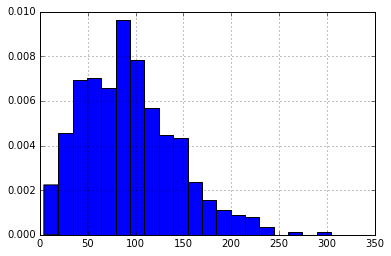

In [22]:
data['rain'].hist(normed=True, bins=20)

There are a few possible choices, but one suitable alternative is the [**gamma distribution**](http://en.wikipedia.org/wiki/Gamma_distribution):

There are three different parametrizations in common use, we're gonna use the the one below, with shape parameter $\alpha$ and an inverse scale parameter $\beta$ called a *rate parameter*.

<div style="font-size: 120%;">  
$$x \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

##### Method of moments

The ***method of moments*** simply assigns the empirical mean and variance to their theoretical counterparts, so that we can solve for the parameters.

So, for the gamma distribution, it turns out (see the relevant section in [the wikipedia article](http://en.wikipedia.org/wiki/Gamma_distribution)) that the mean and variance are:

<div style="font-size: 120%;">  
$$ \hat{\mu} = \alpha \beta $$
$$ \hat{\sigma}^2 = \alpha \beta^2 $$
</div>

So, if we solve for $\alpha$ and $\beta$, using the **sample** mean ($\bar{X}$) and variance ($S^2$), we can use a gamma distribution to describe our data:

<div style="font-size: 120%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

first step: we calculate the **sample mean and variance**, using pandas convenience methods 

In [23]:
precip_mean = data['rain'].mean() # sample mean 
precip_var = data['rain'].var() # sample variance

In [24]:
print("mean: {:4.2f}\nvariance: {:4.2f}".format(precip_mean, precip_var))

mean: 92.84
variance: 2415.10


second step: we calculate the parameters $\alpha$ and $\beta$ using the relations above

In [25]:
alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean

We import the ```gamma``` function from the scipy.stats.distributions sub-package  
The implementation of the Gamma function in scipy requires a *location* parameter, left to zero

In [26]:
from scipy.stats.distributions import gamma 

In [27]:
gmom = gamma(alpha_mom, 0, beta_mom)

#or gmom = gamma(alpha_mom, scale=beta_mom)

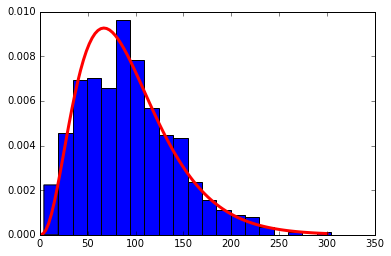

In [28]:
plt.hist(data['rain'], normed=True, bins=20)
plt.plot(np.linspace(0, 300, 100), gmom.pdf(np.linspace(0, 300, 100)), lw=3, c='r')

##### Maximum Likelihood Estimates using the .fit() method

In [29]:
shape,loc,scale = gamma.fit(data['rain'])

In [30]:
shape, loc, scale

(5.4226744288636759, -23.42470840617959, 21.440307265117255)

In [31]:
alpha_mom, beta_mom

(3.5688298364400284, 26.013875195669204)

In [32]:
gmle = gamma(shape,loc,scale)

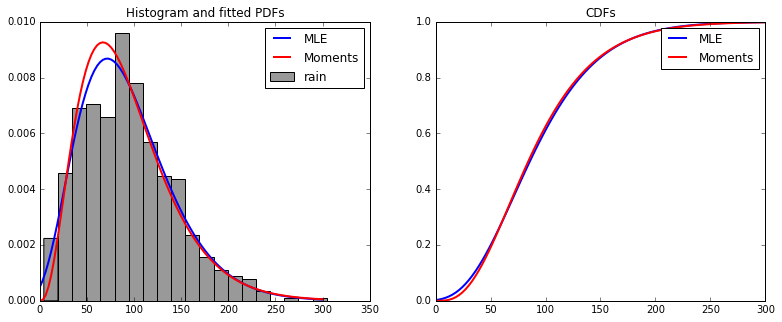

In [33]:
f, (ax0, ax1) = plt.subplots(1,2,figsize=(13,5))

rmax = 300; N=100

ax0.hist(data['rain'], normed=True, bins=20, color='0.6')
ax0.plot(np.linspace(0, rmax, N), gmle.pdf(np.linspace(0, rmax, N)), 'b-', lw=2, label='MLE')
ax0.plot(np.linspace(0, rmax, N), gmom.pdf(np.linspace(0, rmax, N)), 'r-', lw=2, label='Moments')
ax0.legend()
ax0.set_title('Histogram and fitted PDFs')
ax1.plot(np.linspace(0, rmax, N), gmle.cdf(np.linspace(0, rmax, N)), 'b-', lw=2, label='MLE')
ax1.plot(np.linspace(0, rmax, N), gmom.cdf(np.linspace(0, rmax, N)), 'r-', lw=2, label='Moments')
ax1.legend()
ax1.set_title('CDFs');

**Goodness of fit** tests are available in scipy.stats, through e.g. 

+ the Kolmogorov-Smirnoff test (`scipy.stats.kstest`)
+ the Anderson-Darling test (`scipy.stats.anderson`)

In [34]:
from scipy.stats import kstest

In [35]:
kstest(data['rain'], 'gamma', (shape, loc, scale))

KstestResult(statistic=0.042221063815750248, pvalue=0.23225004179300757)

In [36]:
kstest(data['rain'], 'gamma', (alpha_mom, 0, beta_mom))

KstestResult(statistic=0.053854461458692882, pvalue=0.06075637154092739)

### Non Parametric Density estimation: Kernel Density Estimation

In some instances, we may not be interested in the parameters of a particular distribution of data, but just a smoothed representation of the data. In this case, we can estimate the distribution *non-parametrically* (i.e. making no assumptions about the form of the underlying distribution) using [Kernel Density Estimation](http://en.wikipedia.org/wiki/Kernel_density_estimation).

If you are interested into an excellent discussion of the various options in Python to perform Kernel Density Estimation, have a look at this [post](http://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/) on Jake VanderPlas blog [Pythonic Perambulations](http://jakevdp.github.io/). Some more stuff on KDE is available [here](http://www.mglerner.com/blog/?p=28) from Michael Lerner.  

In a nutschell, (Gaussian) Kernel density estimation works 'simply' by summing up Gaussian functions (PDFs) centered on each data point. Each Gaussian function is characterized by a location parameter (the value of the data point), and a scale parameter ($\sigma$) which is related to the 'bandwith' of your (Gaussian) kernel.

In [37]:
# Some random data
y = np.random.random(15) * 10
y

array([ 4.58998095,  2.08153504,  1.74786442,  7.70136074,  8.99899843,
        1.89835669,  3.36069049,  4.22635611,  4.06399547,  5.30392619,
        8.77752183,  2.99966084,  5.66664918,  5.61724582,  2.18004442])

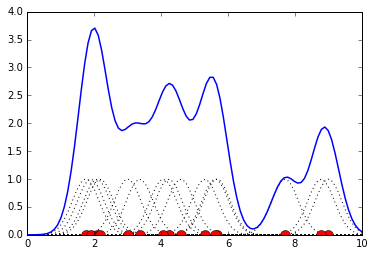

In [38]:
x = np.linspace(0, 10, 100)
# Smoothing parameter
s = 0.4
# Calculate the kernels
kernels = np.transpose([stats.distributions.norm.pdf(x, yi, s) for yi in y])
plt.plot(x, kernels, 'k:', lw=1)
plt.plot(x, kernels.sum(1), lw=1.5)
plt.plot(y, np.zeros(len(y)), 'ro', ms=10)

#### Univariate KDE

Kernel Density Estimation is implemented in scipy.stats.kde by [scipy.stats.kde.gaussian_kde](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html)

In [39]:
from scipy.stats.kde import gaussian_kde

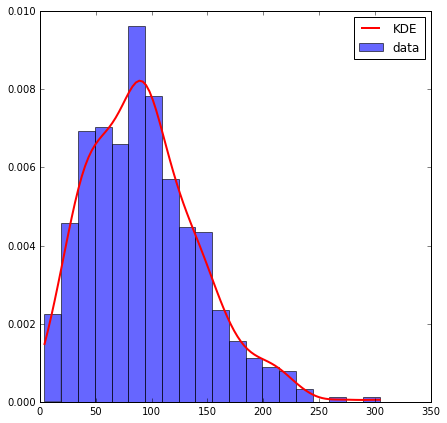

In [40]:
f, ax = plt.subplots(figsize=(7,7))

xgrid = np.linspace(data['rain'].min(), data['rain'].max(), 100)
density = gaussian_kde(data['rain']).evaluate(xgrid)

ax.hist(data['rain'], bins=20, normed=True, label='data', alpha=.6)
ax.plot(xgrid, density, 'r-', lw=2, label='KDE')
ax.legend()

#### Multivariate Kernel Density Estimation

An example in 2 dimensions (from [https://gist.github.com/endolith/1035069](https://gist.github.com/endolith/1035069))

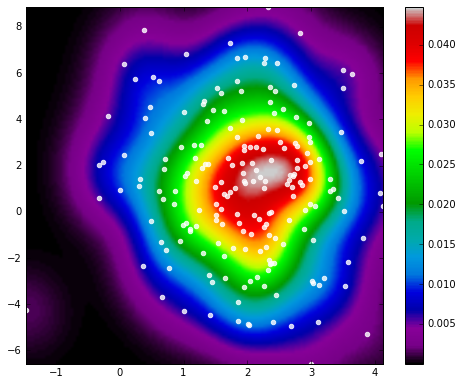

In [41]:
# Create some dummy data
rvs = np.append(stats.norm.rvs(loc=2,scale=1,size=(200,1)),
                stats.norm.rvs(loc=1,scale=3,size=(200,1)),
                axis=1)
 
kde = stats.kde.gaussian_kde(rvs.T)
 
# Regular grid to evaluate kde upon
x_flat = np.r_[rvs[:,0].min():rvs[:,0].max():128j]
y_flat = np.r_[rvs[:,1].min():rvs[:,1].max():128j]

x,y = np.meshgrid(x_flat,y_flat)

grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)
 
z = kde(grid_coords.T)
z = z.reshape(128,128)
 
# Plot
f, ax = plt.subplots(figsize=(8,8))
ax.scatter(rvs[:,0],rvs[:,1],alpha=0.8,color='white')
im = ax.imshow(z,aspect=x_flat.ptp()/y_flat.ptp(),origin='lower',\
          extent=(rvs[:,0].min(),rvs[:,0].max(),rvs[:,1].min(),rvs[:,1].max()),\
          cmap=plt.get_cmap('spectral'))
plt.colorbar(im, shrink=0.8);

### Statistical tests 

One commonly used parametric test is the *Student t-test*, which determines whether two independant samples have - statistically - different means, under the assumption that the two samples are normally distributed. The Null hypothesis is that the two samples have **identical** means.

In [42]:
stats.ttest_ind?

In [43]:
X = stats.distributions.norm(loc=5, scale=10)
Y = stats.distributions.norm(loc=3, scale=10)

Xrvs = X.rvs(size=(1000))
Yrvs = Y.rvs(size=(1000))

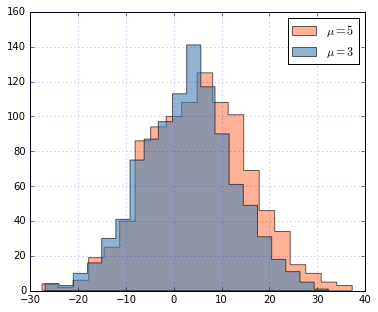

In [44]:
f, ax = plt.subplots(figsize=(6,5))
ax.hist(Xrvs,histtype='stepfilled', bins=20, color='coral', alpha=.6, label=r'$\mu = 5$')
ax.hist(Yrvs,histtype='stepfilled', bins=20, color='steelblue', alpha=.6, label=r'$\mu = 3$')
ax.grid(color='b',alpha=.6)
ax.legend();

In [45]:
t, p = stats.ttest_ind(Xrvs, Yrvs)
print("""\n
T statistics = {0} ~= {0:4.2f}
P-value = {1} ~= {1:4.2f}
""".format(t, p))



T statistics = 4.976016183194781 ~= 4.98
P-value = 7.046337886272383e-07 ~= 0.00



### Correlation (Pearson's R)

In [46]:
from scipy.stats import pearsonr

We're gonna apply that to Time-Series of NINO3.4 and the SOI 

The NINO indices come from [http://www.cpc.ncep.noaa.gov/data/indices/ersst3b.nino.mth.81-10.ascii](http://www.cpc.ncep.noaa.gov/data/indices/ersst3b.nino.mth.81-10.ascii)

The SOI is in the `data` directory

In [47]:
import os
from datetime import datetime
from dateutil import parser
import pandas as pd

In [57]:
nino_url = "http://www.cpc.ncep.noaa.gov/data/indices/ersst3b.nino.mth.81-10.ascii"

In [58]:
nino = pd.read_table(nino_url, sep='\s+', engine='python')
# if not working try: 
# nino = pd.read_table('../data/ersst3b.nino.mth.81-10.ascii', sep='\s+', engine='python')
dates = [datetime(x[0], x[1], 1) for x in zip(nino['YR'].values, nino['MON'].values)]
nino.index = dates

In [59]:
nino.tail()

,YR,MON,NINO1+2,ANOM,NINO3,ANOM.1,NINO4,ANOM.2,NINO3.4,ANOM.3
2015-06-01,2015,6,25.31,2.23,27.89,1.28,29.76,0.92,28.76,1.07
2015-07-01,2015,7,24.39,2.40,27.44,1.65,29.65,0.85,28.64,1.36
2015-08-01,2015,8,22.88,1.78,27.05,1.85,29.62,0.90,28.52,1.59
2015-09-01,2015,9,23.05,2.17,27.21,2.19,29.65,0.93,28.68,1.85
2015-10-01,2015,10,23.38,2.18,27.29,2.23,29.72,1.00,28.79,2.00


In [60]:
soipath = '../data'
def get_SOI(soipath, start_date='1950-01-01'):
    soi = pd.read_csv(os.path.join(soipath,'NIWA_SOI.csv'), index_col=0)
    soi = soi.stack()
    soi = soi.dropna()
    dates = [parser.parse("%s-%s-%s" % (str(int(x[0])), x[1], "1")) for x in soi.index]
    soidf = pd.DataFrame(soi.values, index=dates, columns=['SOI'])
    soidf = soidf.truncate(before=start_date)
    return soidf

creates another DataFrame containing the SOI

In [61]:
df = get_SOI(soipath)

In [62]:
df.tail()

,SOI
2014-11-01,-1.0
2014-12-01,-0.6
2015-01-01,-0.7
2015-02-01,0.0
2015-03-01,-1.0


Will automaticall **ALIGN** the DataFrames, see [Pandas.ipynb](./Pandas.ipynb)

In [63]:
df['nino'] = nino['ANOM.3']

In [64]:
r, p = pearsonr(df['SOI'], df['nino'])

print("R = {0:<4.2f}, p-value = {1:<4.2f}".format(r,p))

R = -0.71, p-value = 0.00


In [65]:
#df = pd.DataFrame({'SOI':soi['SOI'],'nino':nino['ANOM.3']}, index=nino.index)

In [66]:
#df.to_csv('./data/soi_nino.csv')

## Interpolation: Scipy.interpolate

There are several interfaces for performing 1D, 2D or N Dimensional interpolation using scipy.

For more on that I refer you to 

+ [http://docs.scipy.org/doc/scipy/reference/interpolate.html](http://docs.scipy.org/doc/scipy/reference/interpolate.html)
+ [http://wiki.scipy.org/Cookbook/Interpolation](http://wiki.scipy.org/Cookbook/Interpolation)

Here we're going to see one simple example in 1D and 2D using [Radial Basis Functions](http://en.wikipedia.org/wiki/Radial_basis_function) using the default (Multiquadric)

### 1D interpolation

In [67]:
from scipy.interpolate import interp1d

In [68]:
x = np.linspace(0, 10, 10)
y = np.sin(x)

In [69]:
x

array([  0.        ,   1.11111111,   2.22222222,   3.33333333,
         4.44444444,   5.55555556,   6.66666667,   7.77777778,
         8.88888889,  10.        ])

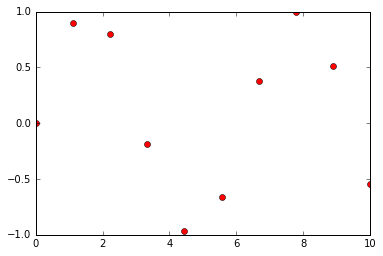

In [70]:
plt.plot(x,y,'ro')

In [71]:
f1 = interp1d(x, y) # default is linear

In [72]:
f2 = interp1d(x, y, kind='cubic') # and we're gonna try cubic interpolation for comparison

In [73]:
xnew = np.linspace(0, 10, 50)

In [74]:
ylin = f1(xnew)
ycub = f2(xnew)

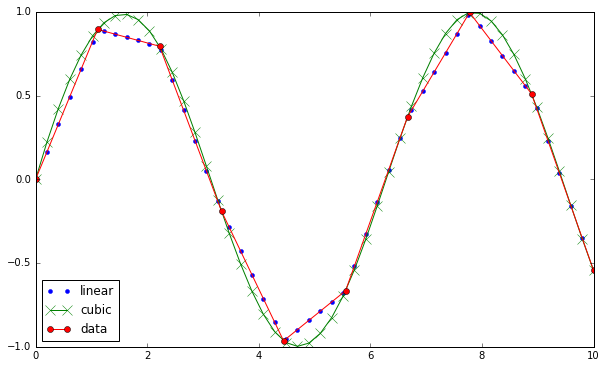

In [75]:
f, ax = plt.subplots(figsize=(10,6))
ax.plot(xnew, ylin, 'b.', ms=8, label='linear')
ax.plot(xnew, ycub, 'gx-', ms=10, label='cubic')
ax.plot(x,y,'ro-', label='data')
ax.legend(loc='lower left')

### 2D interpolation using Radial Basis Functions

In [76]:
from scipy.interpolate import Rbf

In [77]:
# defines a function of X and Y
def func(x,y):
    return x*np.exp(-x**2-y**2)

In [78]:
np.random.seed(1) # we 'fix' the generation of random numbers so that we've got consistent results

x = np.random.uniform(-2., 2., 100)
y = np.random.uniform(-2., 2., 100)

z = func(x,y)

ti = np.linspace(-2.0, 2.0, 100)

XI, YI = np.meshgrid(ti, ti) # meshgrid creates uniform 2D grids from 1D vectors

# use RBF
rbf = Rbf(x, y, z, epsilon=2) # instantiates the interpolator
# you might want to play with the epsilon optional parameter 

ZI = rbf(XI, YI) # interpolate on grid

In [79]:
# this is the 'True' field, the result of the function evaluated on a regular grid
true_Z = func(XI, YI)

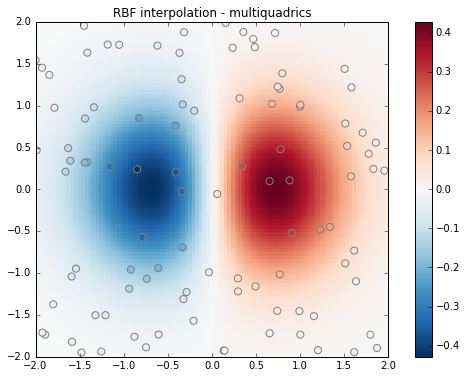

In [80]:
# plot the result
f, ax = plt.subplots(figsize=(8,6))
im = ax.pcolor(XI, YI, ZI, cmap=plt.get_cmap('RdBu_r'))
ax.scatter(x, y, 50, z, cmap=plt.get_cmap('RdBu_r'), edgecolor='.5')
ax.set_title('RBF interpolation - multiquadrics')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.colorbar(im, orientation='vertical', pad=0.06); 

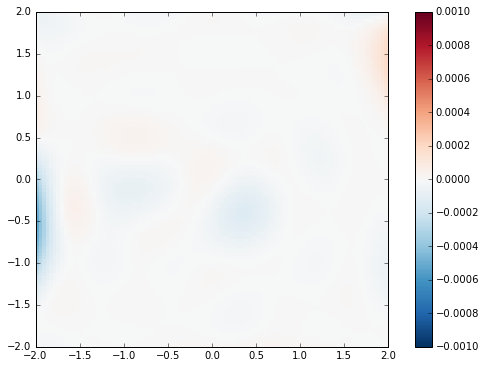

In [81]:
# plot the difference between the 'true' field and the interpolated 
f, ax = plt.subplots(figsize=(8,6))
im = ax.pcolor(XI, YI, ZI - true_Z, cmap=plt.get_cmap('RdBu_r'), vmin=-1e-3, vmax=1e-3)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.colorbar(im, orientation='vertical', pad=0.06); 

## Curve fitting with scipy.optimize

In this case you want to fit noisy, e.g. experimental, data to **a specific function**, with *unknown parameters*

In [82]:
from scipy.optimize import curve_fit

The algorithm uses the [Levenberg-Marquardt](http://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm) algorithm to perform non-linear least-square optimization

In [83]:
def fitFunc(t, a, b, c):
    """ 
    defines the function
    takes 3 parameters: a, b and c
    """
    return a*np.exp(-b*t) + c

In [84]:
### defines the evaluation domain
t = np.linspace(0,4,50)

### defines the paramaters 
a = 5.0
b = 1.5
c = 0.5

### create the response
temp = fitFunc(t, a, b, c)

### add some noise to simulate "real world observations" such as experimental data
noisy = temp + 0.4 * np.random.normal(size=len(temp)) 

### use curve_fit to estimate the parameters and the covariance matrices
fitParams, fitCovariances = curve_fit(fitFunc, t, noisy)

afit, bfit, cfit = tuple(fitParams)

print("\nEstimated parameters\na: {0:<4.2f}, b: {1:<4.2f}, c: {2:<4.2f}\n\n".format(afit, bfit, cfit))


Estimated parameters
a: 5.03, b: 1.64, c: 0.64




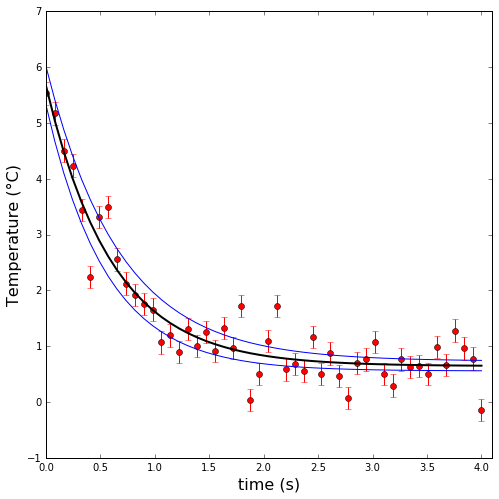

In [85]:
f, ax = plt.subplots(figsize=(8,8))
ax.set_ylabel(u'Temperature (\xb0C)', fontsize = 16)
ax.set_xlabel('time (s)', fontsize = 16)
ax.set_xlim(0,4.1)
# plot the data as red circles with vertical errorbars
ax.errorbar(t, noisy, fmt = 'ro', yerr = 0.2)
# now plot the best fit curve 

ax.plot(t, fitFunc(t, afit, bfit, cfit),'k-', lw=2)

# and plot the +- 1 sigma curves
# (the square root of the diagonal covariance matrix  
# element is the uncertainty on the fit parameter.)

sigma_a, sigma_b, sigma_c = np.sqrt(fitCovariances[0,0]), \
np.sqrt(fitCovariances[1,1]), \
np.sqrt(fitCovariances[2,2])

ax.plot(t, fitFunc(t, afit + sigma_a, bfit - sigma_b, cfit + sigma_c), 'b-')
ax.plot(t, fitFunc(t, afit - sigma_a, bfit + sigma_b, cfit - sigma_c), 'b-');

### A little exercise of curve fitting 

solution available at [http://nbviewer.ipython.org/gist/nicolasfauchereau/79131703a0340e1ed82a](http://nbviewer.ipython.org/gist/nicolasfauchereau/79131703a0340e1ed82a)

In [86]:
import pandas as pd

In [87]:
data= pd.read_excel('../data/rainfall_calibration.xlsx', sheetname='Sheet1')

In [88]:
data.head()

,Rainfall,Level
0,0.0,0
1,0.1,1
2,0.8,2
3,2.0,3
4,4.0,4


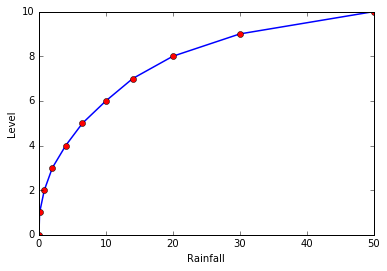

In [89]:
f, ax = plt.subplots()
ax.plot(data['Rainfall'], data['Level'], 'b', lw=1.5)
ax.plot(data['Rainfall'], data['Level'], 'ro')
ax.set_xlabel('Rainfall')
ax.set_ylabel('Level')

...

## Getting data in and out of Python

### text (tab or space delimited) ASCII in Numpy 

Python itself has a very good support for IO and dealing with ascii files 

    f = open('filename','r') 
    out = f.readlines() 
    f.close() 
    

In [90]:
f = open('../data/ascii_table.txt', 'r')

In [91]:
out = f.readlines()

In [92]:
f.close()

In [93]:
out

['   0    1    2    3    4    5    6    7    8    9\n',
 '  10   11   12   13   14   15   16   17   18   19\n',
 '  20   21   22   23   24   25   26   27   28   29\n',
 '  30   31   32   33   34   35   36   37   38   39\n',
 '  40   41   42   43   44   45   46   47   48   49\n',
 '  50   51   52   53   54   55   56   57   58   59\n',
 '  60   61   62   63   64   65   66   67   68   69\n',
 '  70   71   72   73   74   75   76   77   78   79\n',
 '  80   81   82   83   84   85   86   87   88   89\n',
 '  90   91   92   93   94   95   96   97   98   99\n']

In [94]:
out = [map(np.int, x.split()) for x in out]

In [95]:
out

In [96]:
out = np.array(out)

In [97]:
print(out)

[<map object at 0x12545c3c8> <map object at 0x1255092b0>
 <map object at 0x1254cdb00> <map object at 0x1254787b8>
 <map object at 0x1252e8978> <map object at 0x125472630>
 <map object at 0x125472d30> <map object at 0x1254e3358>
 <map object at 0x1254e89b0> <map object at 0x1256277f0>]


In [98]:
out.shape

(10,)

In [99]:
with open('../data/ascii_table.txt', 'r') as f: 
    out = f.readlines()
    out = [map(np.int, x.split()) for x in out]
    out = np.array(out)

In [100]:
np.genfromtxt

<function numpy.lib.npyio.genfromtxt>

In [101]:
a = np.genfromtxt('../data/ascii_table.txt', dtype=int) # can handle missing values 

In [102]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [103]:
#np.loadtxt() ### each row must have the same number of values

In [104]:
a = np.loadtxt('../data/ascii_table.txt', dtype=np.int)

In [105]:
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

but all that is a pain !, for reading all csv, tabular format files including xls, xlsx, etc. the most convenient way is to use the special IO functions of [Pandas](http://pandas.pydata.org), which we have seen for the SOI / NINO example, and will see in more details in the pandas notebook. All these functions will load these formats directly into Pandas DataFrames, which are a very convenient data structure for interacting with spreadsheet-like data. See the [Pandas.ipynb](./Pandas.ipynb) notebook. 

### Special formats

#### NetCDF 

NetCDF stands for [Network Common Data form](http://www.unidata.ucar.edu/software/netcdf/), it is used largely in the atmosphere and ocean sciences to store mostly gridded datasets.

To read / write **NetCDF** files, I recommend using the [netCDF4](http://netcdf4-python.googlecode.com/svn/trunk/docs/netCDF4-module.html) standalone module, which is installed as part of the Anaconda distribution, and has lots of functionalities, including: 

+ support of NetCDF 4 (and NetCDF 3).
+ support for reading multiple files datasets as a single dataset.
+ can create files that are readable by HDF5 clients.

In [106]:
from netCDF4 import Dataset

In [107]:
#with Dataset('data/Hadley_SST.nc', 'r') as nc:

nc = Dataset('../data/NCEP2_airtemp2m_2014_anoms.nc', 'r')

In [108]:
nc.variables.keys()

odict_keys(['lat', 'air', 'time', 'lon', 'month'])

In [109]:
temp = nc.variables['air'][:]
lon = nc.variables['lon'][:]
lat = nc.variables['lat'][:]

In [110]:
temp.shape

(12, 94, 192)

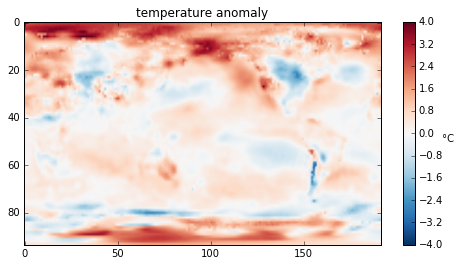

In [111]:
f, ax = plt.subplots(figsize=(8,4))
im = ax.imshow(temp.mean(0), vmin=-4, vmax=4, aspect='auto',\
              cmap=plt.get_cmap('RdBu_r'))
ax.set_title('temperature anomaly')
cb = plt.colorbar(im);
cb.set_label(u'\xb0C', rotation=0)

In [112]:
Image(url='http://www.giss.nasa.gov/research/news/20150116/2014_annual_w-colorbar.png')

netCDF4 is not restricted to local files

you should be able to access NetCDF datasets over the network through e.g. [OPenDAP](http://en.wikipedia.org/wiki/OPeNDAP)

In [113]:
nc = Dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/interp_OLR/olr.mon.ltm.nc', 'r')

In [114]:
nc.variables.keys()

odict_keys(['lon', 'lat', 'time', 'olr'])

In [115]:
olr = nc.variables['olr'][0,:,:]

In [116]:
olr.shape

(73, 144)

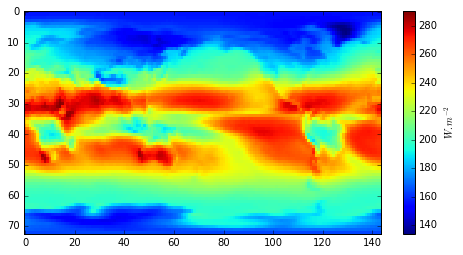

In [117]:
f, ax = plt.subplots(figsize=(8,4))
im = ax.imshow(olr, interpolation='nearest', aspect='auto')
plt.colorbar(im, label=r'$W.m^{-2}$')

#### Matlab files

In [118]:
from scipy.io.matlab import loadmat, savemat, whosmat

We first create a matlab file containing one variable

In [119]:
x = np.random.randn(10,10)

In [120]:
savemat('../data/random_2darray.mat', {'xmat':x})

Then inspect its content with `whosmat`

In [121]:
whosmat('../data/random_2darray.mat')

[('xmat', (10, 10), 'double')]

And read it, accessing the saved variable as a numpy arrray using a dict type syntax

In [122]:
matfile = loadmat('../data/random_2darray.mat')

In [123]:
x = matfile['xmat'] # like a dictionnary

For matlab files containing matlab **structures**, the syntax is marginally more complicated 

In [124]:
whosmat('../data/clusters_monthly.mat')

[('clusm', (1, 1), 'struct')]

In [125]:
matfile = loadmat('../data/clusters_monthly.mat', struct_as_record=False)

In [126]:
matfile.keys()

dict_keys(['__version__', '__header__', 'clusm', '__globals__'])

In [127]:
clusm = matfile['clusm'][0][0] ### corresponds to the (1,1) shape as indicated by whosmat

In [128]:
type(clusm)

scipy.io.matlab.mio5_params.mat_struct

In [129]:
### inspect the attributes of clusm
dir(clusm)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_fieldnames',
 'data',
 'name',
 'regimes',
 'regname',
 'time']

In [130]:
clusm._fieldnames

['time', 'data', 'name', 'regimes', 'regname']

In [131]:
t = clusm.time

In [132]:
t

array([[1948,    1],
       [1948,    2],
       [1948,    3],
       ..., 
       [2012,    3],
       [2012,    4],
       [2012,    5]], dtype=uint16)

In [133]:
data = clusm.data

In [134]:
data.shape

(773, 12)

**IMPORTANT**: A note on **matlab dates and time**

Matlab's **datenum** representation is the number of days since midnight on **January 1st, 0 AD.**  Python's datetime handling, (throught the datetime.fromordinal function) assumes time is the number of days since midnight on **January 1st, 1 AD.**  So the duration of year 0 separates the time representation returned by python's fromordinal function and the time representation used by matlab. 

In [135]:
matlab_datenum = 731965.04835648148 

The following snippet is from Conrad Lee at [https://gist.github.com/conradlee/4366296](https://gist.github.com/conradlee/4366296)

In [136]:
from datetime import datetime, timedelta
 
python_datetime = datetime.fromordinal(int(matlab_datenum)) \
+ timedelta(days=matlab_datenum%1) - timedelta(days = 366) ## year 0 was a leap year

In [137]:
python_datetime

datetime.datetime(2004, 1, 19, 1, 9, 38)

In [138]:
print(python_datetime)

2004-01-19 01:09:38


#### Other file formats

**HDF5** 

Please See [http://www.h5py.org/](http://www.h5py.org/)


**IDL**: 
    
    from scipy.io import idl
    idl.readsav()
    
**Fortran files**: 

    from scipy.io import FortranFile
    f = FortranFile()
    
    Examples
    --------
    To create an unformatted sequential Fortran file:
    
    >>> from scipy.io import FortranFile
    >>> f = FortranFile('test.unf', 'w')
    >>> f.write_record(np.array([1,2,3,4,5],dtype=np.int32))
    >>> f.write_record(np.linspace(0,1,20).reshape((5,-1)))
    >>> f.close()
    
    To read this file:
    
    >>> from scipy.io import FortranFile
    >>> f = FortranFile('test.unf', 'r')
    >>> print(f.read_ints(dtype=np.int32))
    [1 2 3 4 5]
    >>> print(f.read_reals(dtype=np.float).reshape((5,-1)))
    [[ 0.          0.05263158  0.10526316  0.15789474]
     [ 0.21052632  0.26315789  0.31578947  0.36842105]
     [ 0.42105263  0.47368421  0.52631579  0.57894737]
     [ 0.63157895  0.68421053  0.73684211  0.78947368]
     [ 0.84210526  0.89473684  0.94736842  1.        ]]
    >>> f.close()
    